In [ ]:
import pandas
#pandas.read_pickle('train_prob1.pkl.gz')

In [ ]:
import numpy as np
df=pandas.DataFrame(np.random.randn(5,5))
df.columns=list('ABCDE')
df.iloc[1,1]=np.nan

In [ ]:
#시간string 처리 방법 고안
#오리진-데스티네이션 string 처리 방안 고안

In [ ]:
len0, len1, len2 = 0,0,0
for status in raw_data["status"]:
  if status == "status0": len0 += 1
  elif status == "status1": len1 += 1 
  elif status == "status2": len2 += 1
print("len0 : %d  len1 : %d  len2 : %d  "%(len0, len1, len2))

len0 : 295718  len1 : 281739  len2 : 54818  


In [ ]:
print(len(raw_data["status"]), "   ", len0+len1+len2)

632275     632275


## data preprocessing

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

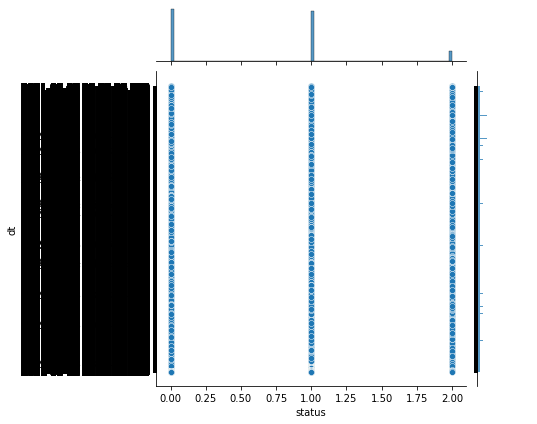

In [ ]:
sns.jointplot(x="status", y="dt", data=raw_data)
#plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

In [ ]:
#년월일을 그냥 요일로만 해주는 것이 나은 방법 아닐까? #####

In [ ]:
#날짜-시간 전처리
from datetime import datetime
dateFormatter = "%Y-%m-%d %H:%M:%S.%f"

for i in range(len(raw_data["dt"])):
  converted_datetime = datetime.strptime(raw_data["dt"][i], dateFormatter)
  raw_data["dt"][i] =  converted_datetime.timestamp()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
dateFormatter = "%Y-%m-%d %H:%M:%S.%f"

for i in range(len(test_data["dt"])):
  converted_datetime = datetime.strptime(test_data["dt"][i], dateFormatter)
  test_data["dt"][i] =  converted_datetime.timestamp()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(i)

115932


In [ ]:
#unseen position 개수
unseen_num = 0
#test_data["destination_code"] = pos_encoder.transform(test_data["destination_code"])
for i in range(len(test_data["destination_code"])):
  try:
    pos_encoder.transform( [ test_data["destination_code"][i] ] )
  except:
    unseen_num += 1


In [ ]:
print(unseen_num)   #unseen 개수 45개

45


## feature encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
pos_encoder= LabelEncoder()
pos_encoder.fit(raw_data["origin_code"])
pos_encoder.fit(raw_data["destination_code"] )
raw_data["origin_code"] = pos_encoder.transform(raw_data["origin_code"])
#destination_labels = pos_encoder.transform(raw_data["destination_code"])
#print(origin_labels)
#print(destination_labels)

In [ ]:
raw_data["destination_code"] = pos_encoder.transform(raw_data["destination_code"])
#print(destination_labels)

In [ ]:
#pos_encoder.transform(['91ac1c20235509e1fece640e9900f31e3d16e56a'])

In [ ]:
class_encoder= LabelEncoder()
class_encoder.fit(raw_data["status"])
raw_data["status"] = class_encoder.transform(raw_data["status"])


In [ ]:
test_data["origin_code"] = pos_encoder.transform(test_data["origin_code"])
test_data["status"] = class_encoder.transform(test_data["status"])

In [ ]:
#test_data["destination_code:]에 unseen 45개 있음.. 그냥 label해줌
pos_encoder.fit(test_data["destination_code"] )

test_data["destination_code"] = pos_encoder.transform(test_data["destination_code"])


In [ ]:
test_data.to_csv("test_data.csv")

In [ ]:
raw_data.to_csv("train_data.csv")

In [ ]:
import numpy as np

In [ ]:
import pandas

raw = pandas.read_csv("train_data.csv")
test = pandas.read_csv("test_data.csv")

In [ ]:
raw_data = raw.drop(raw.columns[0], axis=1)  #df.columns[i]

In [ ]:
test_data = test.drop(test.columns[0], axis=1)

In [ ]:
X_train = raw_data

In [ ]:
y_train = raw_data["status"]

In [ ]:
X_test = test_data
y_test = test_data["status"]
X_test.drop(["status"], axis="columns")

## Modeling and Evaluation

In [ ]:
#logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_lr.score(X_train, y_train)

0.46770471709303707

In [ ]:
model_lr.score(X_test, y_test)

0.4211606803988545

In [ ]:
y_pred = model_lr.predict(X_train)
print( accuracy_score(y_pred, y_train) )

y_pred = model_lr.predict(X_test)
print( accuracy_score(y_pred, y_test) )

0.46770471709303707
0.4211606803988545


In [ ]:
#svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model_svm = LinearSVC()
model_svm.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
y_pred = model_svm.predict(X_train)
accuracy_score(y_pred, y_train)

0.46770471709303707

In [ ]:
y_pred = model_svm.predict(X_test)
accuracy_score(y_pred, y_test)

0.4211606803988545

In [ ]:
#svm with kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_svm_k = SVC(gamma='auto')
model_svm_k.fit(X_train, y_train)

In [ ]:
y_pred = model_svm_k.predict(X_train)
accuracy_score(y_pred, y_train)

y_pred = model_svm_k.predict(X_test)
accuracy_score(y_pred, y_test)

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier(10)  #tree개수 10-100

model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred = model_rf.predict(X_train)
accuracy_score(y_pred, y_train)

1.0

In [ ]:
y_pred = model_rf.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [ ]:
model_rf50 = RandomForestClassifier(50)  #tree 50
model_rf50.fit(X_train, y_train)
y_pred = model_rf50.predict(X_train)
accuracy_score(y_pred, y_train)
y_pred = model_rf50.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [ ]:
model_rf100 = RandomForestClassifier(100)  #tree 100
model_rf100.fit(X_train, y_train)
y_pred = model_rf100.predict(X_train)
accuracy_score(y_pred, y_train)
y_pred = model_rf100.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model_knn.predict(X_train)
print( accuracy_score(y_pred, y_train) )

y_pred = model_knn.predict(X_test)
print( accuracy_score(y_pred, y_test) )

0.7011031592266024
0.4834126901977021


In [ ]:
#nn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model_mlp = MLPClassifier(hidden_layer_sizes=(16, ), max_iter=1000)
model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16,), max_iter=1000)

In [ ]:
y_pred = model_mlp.predict(X_train)
print( accuracy_score(y_pred, y_train) )

y_pred = model_mlp.predict(X_test)
print( accuracy_score(y_pred, y_test) )

0.4454533233165948
0.4842925163026602
